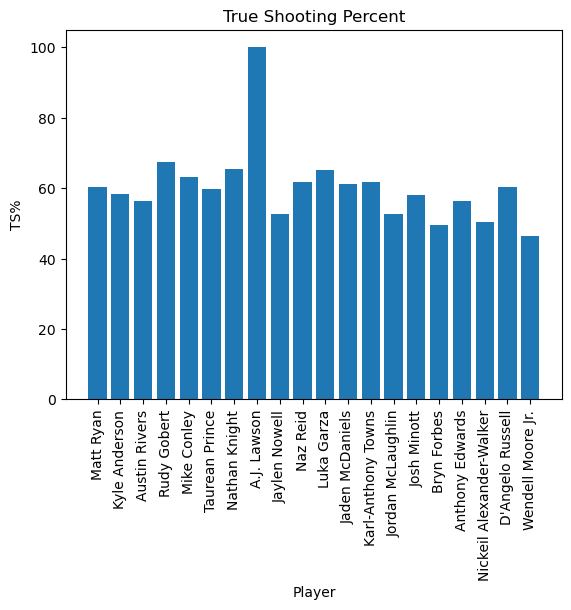

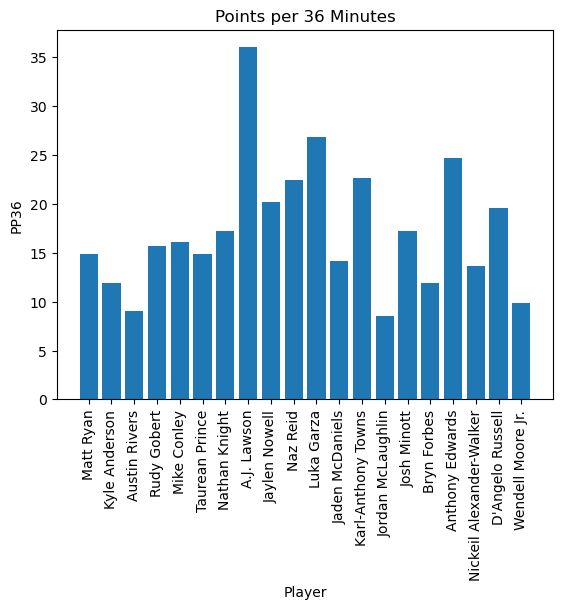

In [3]:
from dotenv import load_dotenv
import requests
import os
import json
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt

#load environment variables
load_dotenv()
apikey=os.environ.get('apikey')

#stats url 
stats_url=f'http://api.sportradar.us/nba/trial/v8/en/seasons/2022/REG/teams/583eca2f-fb46-11e1-82cb-f4ce4684ea4c/statistics.json?api_key=q4y7sgqqad8a3msvgh9d85ay'

timberwolves_data = requests.get(stats_url).json()
stat_data = timberwolves_data['players']
stats_df = pd.DataFrame.from_dict(stat_data)

# Create a new column for TS%
stats_df['TS%'] = 100 * stats_df['total'].apply(lambda x: x['points'] / (2 * (x['field_goals_att'] + 0.44 * x['free_throws_att'])))

# Create a new column for PP36
stats_df['PP36'] = 36 * stats_df['total'].apply(lambda x: x['points'] / x['minutes'])

# Create bar chart for TS%
plt.bar(stats_df['full_name'], stats_df['TS%'])
plt.title('True Shooting Percent')
plt.xlabel('Player')
plt.ylabel('TS%')
plt.xticks(rotation=90)
plt.show()

# Create bar chart for PP36
plt.bar(stats_df['full_name'], stats_df['PP36'])
plt.title('Points per 36 Minutes')
plt.xlabel('Player')
plt.ylabel('PP36')
plt.xticks(rotation=90)
plt.show()